In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from datetime import timedelta
from prophet import Prophet
from datetime import timedelta
import matplotlib.dates as mdates
from calendar import month_abbr
import calendar



# read the data

In [22]:
# Read the data
df = pd.read_csv('/Users/zeynepkaya/PycharmProjects/LSDI-Project-/data/day_ahead_energy_prices.csv', parse_dates=['Datetime'])
 
# Filter data for the last 6 months
# Filter data for the last 6 months
end_date = df['Datetime'].max()
start_date = end_date - timedelta(days=180)
df = df[(df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)].reset_index(drop=True)
# Rename columns for Prophet
df.rename(columns={'Datetime': 'ds', 'hourly day-ahead energy price': 'y'}, inplace=True)

# Ensure the datetime column is correctly formatted
df['ds'] = pd.to_datetime(df['ds'])
df['ds'] = df['ds'].dt.tz_localize(None)  # Remove timezone information


# Initialize the Prophet model

In [23]:
# Initialize the Prophet model
m = Prophet()
m.fit(df)


12:10:55 - cmdstanpy - INFO - Chain [1] start processing
12:10:55 - cmdstanpy - INFO - Chain [1] done processing


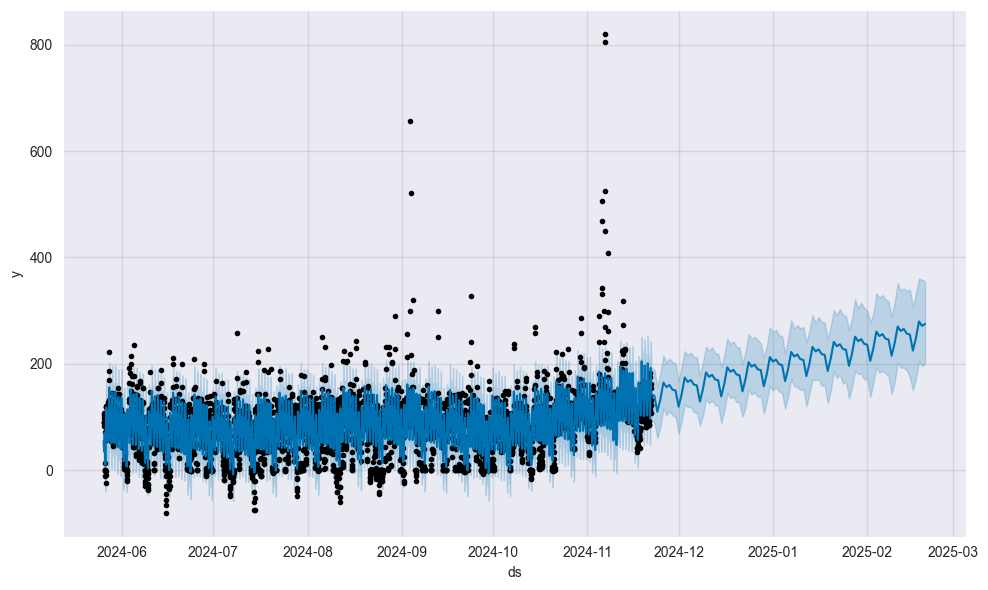

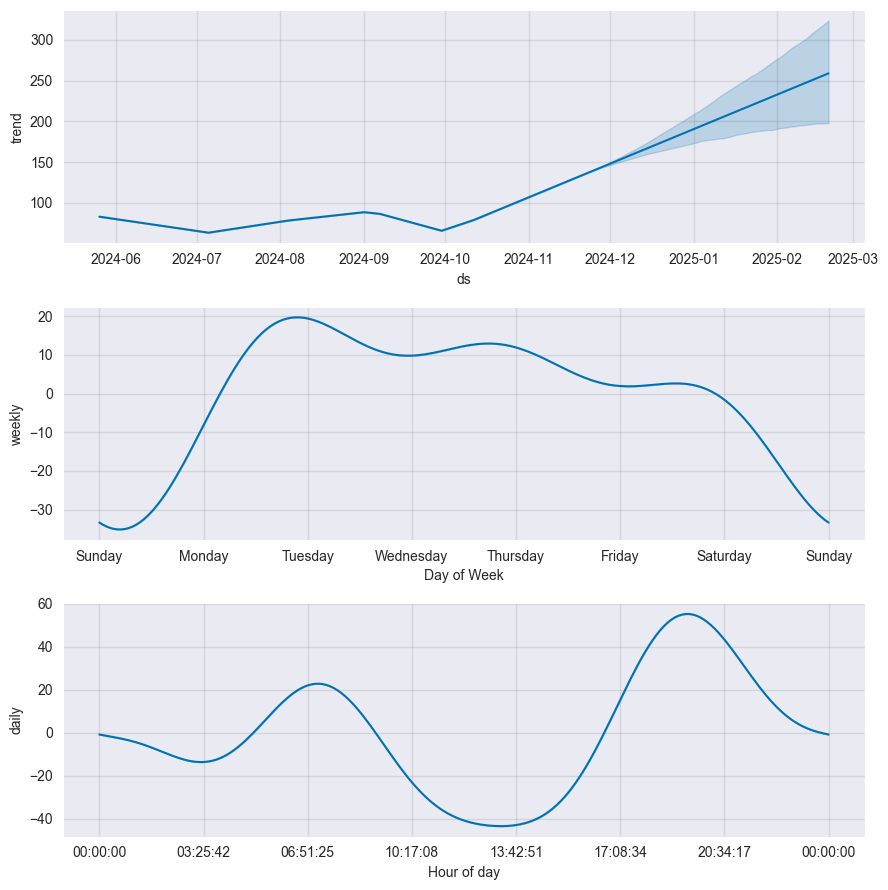

"\nplt.title('Forecasted Energy Prices')\nplt.xlabel('Date')\nplt.ylabel('Energy Price')\nplt.axvline(x=end_date, color='red', linestyle='--')  # Line indicating the end of historical data\n"

In [14]:
# Create a DataFrame to hold future dates (for 3 months ahead)
future = m.make_future_dataframe(periods=90)  # For 90 days ahead

# Make predictions
forecast = m.predict(future)

# Plot the results
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
plt.show()

'''
plt.title('Forecasted Energy Prices')
plt.xlabel('Date')
plt.ylabel('Energy Price')
plt.axvline(x=end_date, color='red', linestyle='--')  # Line indicating the end of historical data
'''

12:11:26 - cmdstanpy - INFO - Chain [1] start processing
12:11:26 - cmdstanpy - INFO - Chain [1] done processing


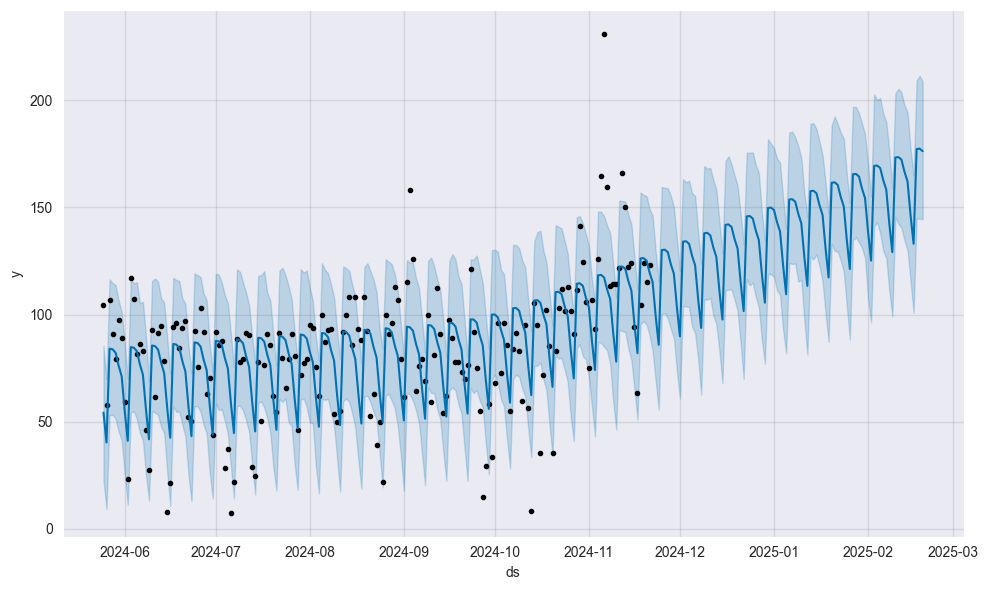

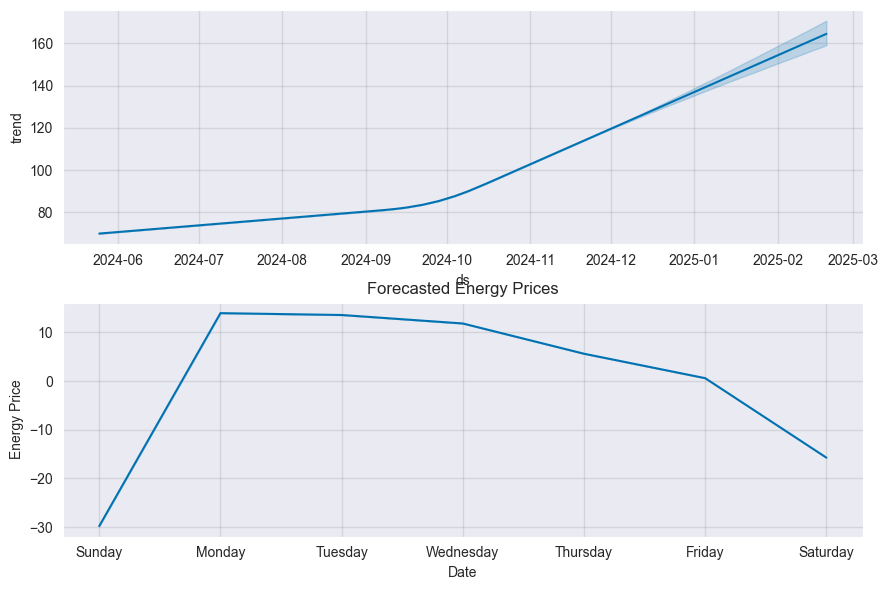

In [27]:
# Calculate Daily Average Prices
daily_avg = df.resample('D', on='ds').mean().reset_index()
# Ensure the datetime column is correctly formatted
daily_avg['ds'] = pd.to_datetime(daily_avg['ds'])
daily_avg['ds'] = daily_avg['ds'].dt.tz_localize(None)  # Remove timezone information

# Initialize the Prophet model
m = Prophet()
m.fit(daily_avg)

# Create a DataFrame to hold future dates (for 3 months ahead)
future = m.make_future_dataframe(periods=90)  # For 90 days ahead

# Make predictions
forecast = m.predict(future)

# Plot the results
fig3 = m.plot(forecast)
fig4 = m.plot_components(forecast)
plt.title('Forecasted Energy Prices')
plt.xlabel('Date')
plt.ylabel('Energy Price')
plt.show()


In [29]:
# Calculate Biweekly Average Prices
biweekly_avg = df.resample('2W', on='ds').mean().reset_index()
biweekly_avg.columns = ['ds', 'y']

# Ensure the datetime column is correctly formatted
biweekly_avg['ds'] = pd.to_datetime(biweekly_avg['ds'])
biweekly_avg['ds'] = biweekly_avg['ds'].dt.tz_localize(None) # Remove timezone information
biweekly_avg.columns

Index(['ds', 'y'], dtype='object')

12:11:38 - cmdstanpy - INFO - Chain [1] start processing
12:11:38 - cmdstanpy - INFO - Chain [1] done processing


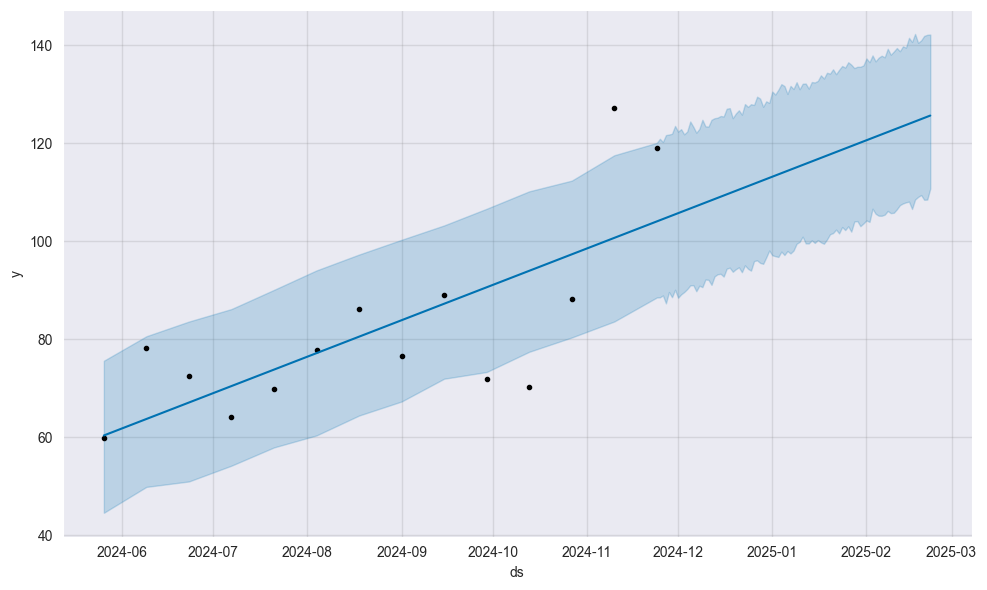

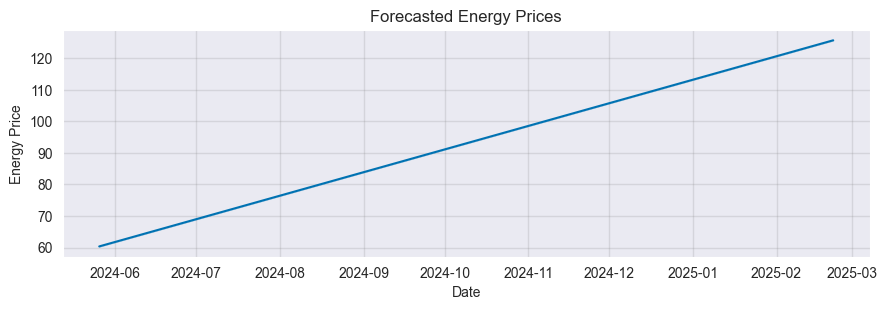

In [30]:
# Initialize the Prophet model
m = Prophet()
m.fit(biweekly_avg)

# Create a DataFrame to hold future dates (for 3 months ahead)
future = m.make_future_dataframe(periods=90) 

# Make predictions
forecast = m.predict(future)

# Plot the results
fig5 = m.plot(forecast)
fig6 = m.plot_components(forecast)
plt.title('Forecasted Energy Prices')
plt.xlabel('Date')
plt.ylabel('Energy Price')
plt.show() 


# Customizing the Heatmap

<function matplotlib.pyplot.show(close=None, block=None)>

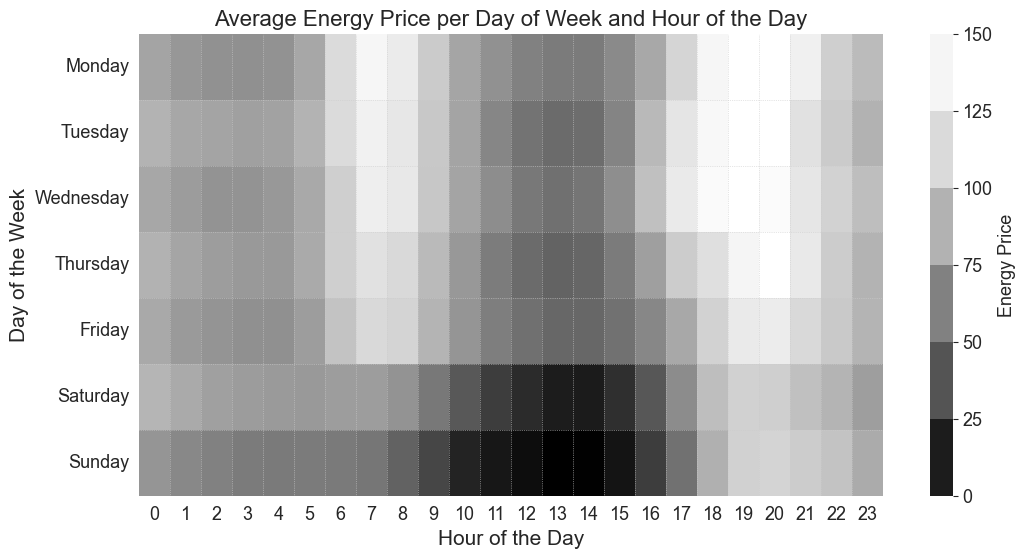

In [32]:
# Extract day of the week and hour
df['day_of_week'] = df['ds'].dt.dayofweek
df['hour'] = df['ds'].dt.hour

# Calculate the average energy price for each day-hour combination
hour_week = df.pivot_table(index='day_of_week', columns='hour', values='y', aggfunc='mean')

# Plotting the Heatmap
f, ax = plt.subplots(figsize=(12, 6))

# Customize the heatmap
sns.heatmap(hour_week, ax=ax, cmap='Greys_r', vmax=150, cbar_kws={'boundaries': np.arange(0, 160, 25)})

# Customize color bar font size and label
cbax = f.axes[1]
[lab.set_fontsize(13) for lab in cbax.yaxis.get_ticklabels()]
cbax.set_ylabel('Energy Price', fontsize=13)

# Add grid lines for day and hour separation
[ax.axhline(x, ls=':', lw=0.5, color='0.8') for x in np.arange(1, 7)]
[ax.axvline(x, ls=':', lw=0.5, color='0.8') for x in np.arange(1, 24)]

# Set title and axis labels
ax.set_title('Average Energy Price per Day of Week and Hour of the Day', fontsize=16)
ax.set_xlabel('Hour of the Day', fontsize=15)
ax.set_ylabel('Day of the Week', fontsize=15)

# Customize tick labels to show full weekday names
ax.set_yticklabels([calendar.day_name[i] for i in range(7)], rotation=0)

# Customize tick label font sizes
[l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
[l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]

# Save the plot in multiple formats
for ext in ['png', 'jpeg', 'pdf']:
    f.savefig(f'energy_dayofweek_hourofday.{ext}', dpi=200)

plt.show

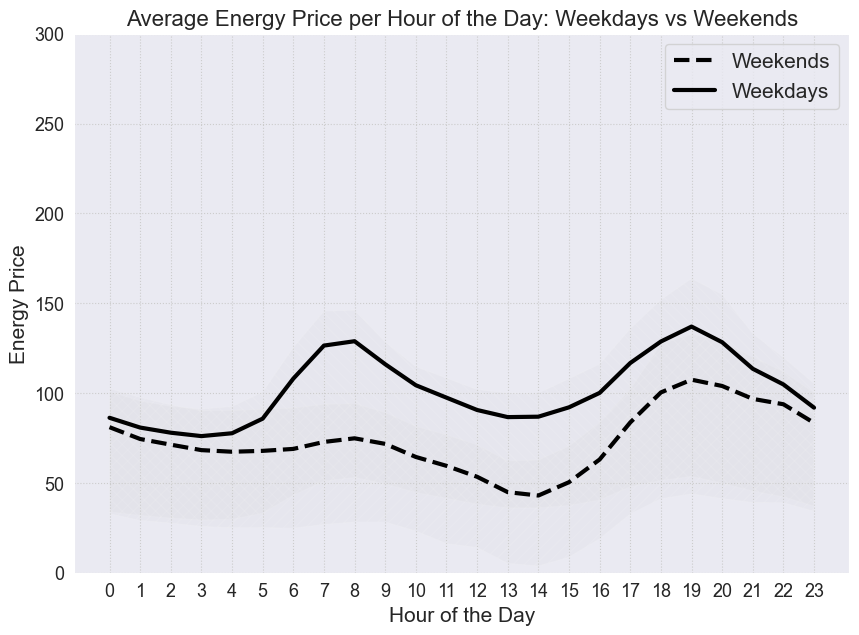

In [36]:
# Assuming 'df' is your DataFrame with 'ds' as datetime and 'y' as energy price.
df = pd.read_csv('/Users/zeynepkaya/PycharmProjects/LSDI-Project-/data/day_ahead_energy_prices.csv', parse_dates=['Datetime'])
df.rename(columns={'Datetime': 'ds', 'hourly day-ahead energy price': 'y'}, inplace=True)
df.set_index('ds', inplace=True)

# Separate weekdays and weekends
weekdays = df.loc[df.index.weekday < 5, 'y']  # Monday to Friday (weekday < 5)
weekends = df.loc[df.index.weekday >= 5, 'y']  # Saturday and Sunday (weekday >= 5)

# Summarize by hour for weekdays and weekends
summary_hour_weekdays = weekdays.groupby(weekdays.index.hour).describe()
summary_hour_weekends = weekends.groupby(weekends.index.hour).describe()

# Plotting
f, ax = plt.subplots(figsize=(10, 7))

# Plot for weekends
ax.plot(summary_hour_weekends.index, summary_hour_weekends['mean'], color='k', label='Weekends', ls='--', lw=3)
ax.fill_between(summary_hour_weekends.index, summary_hour_weekends['25%'], summary_hour_weekends['75%'],
                hatch='///', facecolor='0.8', alpha=0.1)

# Plot for weekdays
ax.plot(summary_hour_weekdays.index, summary_hour_weekdays['mean'], color='k', label='Weekdays', lw=3)
ax.fill_between(summary_hour_weekdays.index, summary_hour_weekdays['25%'], summary_hour_weekdays['75%'],
                hatch='\\\\\\', facecolor='0.8', alpha=0.1)

# Configure x-axis and grid
ax.set_xticks(range(24))
ax.grid(ls=':', color='0.8')

# Set labels and title
ax.set_xlabel('Hour of the Day', fontsize=15)
ax.set_ylabel('Energy Price', fontsize=15)
ax.set_title('Average Energy Price per Hour of the Day: Weekdays vs Weekends', fontsize=16)

# Customize tick label font sizes
[l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
[l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]

# Set y-axis limit for clarity if needed
ax.set_ylim([0, 300])  # Adjust as per your data range

# Add legend
ax.legend(loc='upper right', fontsize=15)

# Save the plot in multiple formats
for ext in ['png', 'jpeg', 'pdf']:
    f.savefig(f'energy_daily_cycle_{ext}', dpi=200)

plt.show()
